# An example of dimension reduction using Principal Component Analysis (PCA)
Represenation of MNIST data in 2 dimension space.

In [0]:
from sklearn.datasets import load_digits # Loading MNIST data using the function "load_digits" provided by sklearn package
from sklearn.decomposition import PCA    # Importing PCA module - actually we do not need this because we are going to use Singular Value Decomposition (SVD)
import numpy as np                       # To use "SVD" function provided by numpy module
import matplotlib.pylab as plt           # Matplot is a library to plot a graph

In [90]:
digits = load_digits()                      # Loading MNIST data: each digit has 8 by 8 dimension 
data, label = digits.data, digits.target    # Seperate the data into two parts: data - its label

print(data.shape)                           # Print the shape of data
print(data[0], label[0])                    # First data and its label
print(data[1796], label[1796])              # Last data and its label

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 0
[ 0.  0. 10. 14.  8.  1.  0.  0.  0.  2. 16. 14.  6.  1.  0.  0.  0.  0.
 15. 15.  8. 15.  0.  0.  0.  0.  5. 16. 16. 10.  0.  0.  0.  0. 12. 15.
 15. 12.  0.  0.  0.  4. 16.  6.  4. 16.  6.  0.  0.  8. 16. 10.  8. 16.
  8.  0.  0.  1.  8. 12. 14. 12.  1.  0.] 8


In [91]:
# This cell groups the data accoriding to their label

NUM_DATA = 1797      # Total data points

zero  = np.empty(0)  # label zero
one   = np.empty(0)  # label one
two   = np.empty(0)  # label two
three = np.empty(0)  # label three
four  = np.empty(0)  # label four
five  = np.empty(0)  # label five
six   = np.empty(0)  # label six
seven = np.empty(0)  # label seven
eight = np.empty(0)  # label eight
nine  = np.empty(0)  # label nine

for i in range(len(label)):
    if (label[i] == 0):                     # If its label is zero
        zero = np.append(zero, data[i])     # then append it to 
    if (label[i] == 1):
        one = np.append(one, data[i])
    if (label[i] == 2):
        two = np.append(two, data[i])
    if (label[i] == 3):
        three = np.append(three, data[i])
    if (label[i] == 4):
        four = np.append(four, data[i])
    if (label[i] == 5):
        five = np.append(five, data[i])
    if (label[i] == 6):
        six = np.append(six, data[i])
    if (label[i] == 7):
        seven = np.append(seven, data[i])
    if (label[i] == 8):
        eight = np.append(eight, data[i])
    if (label[i] == 9):
        nine = np.append(nine, data[i])          

print (eight.shape)                            # See the shape of the data
print (np.reshape(eight, (-1, 8*8)).shape)     # See the shape of the data

(11136,)
(174, 64)


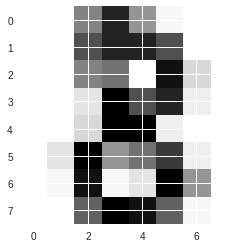

In [92]:
which = eight                                # Let's plot one of the data - number 8

temp_ = np.reshape(which, (-1, 8*8))         # Reshape the data (*, 64)
image = temp_[0,:]                           # Get the first data point among the number 8
image = np.reshape(image,[8,8])              # Reshape the data (8-by-8)  
plt.imshow(image)                            #  
plt.show()                                   # Show in the screen

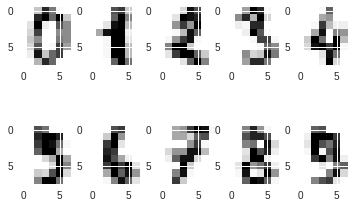

In [93]:
plt.subplot(2,5,1)
plt.imshow(np.reshape(np.reshape(zero, (-1, 8*8))[0,:],[8,8])) # plot zero

plt.subplot(2,5,2)
plt.imshow(np.reshape(np.reshape(one, (-1, 8*8))[0,:],[8,8]))

plt.subplot(2,5,3)
plt.imshow(np.reshape(np.reshape(two, (-1, 8*8))[0,:],[8,8]))

plt.subplot(2,5,4)
plt.imshow(np.reshape(np.reshape(three, (-1, 8*8))[0,:],[8,8]))

plt.subplot(2,5,5)
plt.imshow(np.reshape(np.reshape(four, (-1, 8*8))[0,:],[8,8]))

plt.subplot(2,5,6)
plt.imshow(np.reshape(np.reshape(five, (-1, 8*8))[0,:],[8,8]))

plt.subplot(2,5,7)
plt.imshow(np.reshape(np.reshape(six, (-1, 8*8))[0,:],[8,8]))

plt.subplot(2,5,8)
plt.imshow(np.reshape(np.reshape(seven, (-1, 8*8))[0,:],[8,8]))

plt.subplot(2,5,9)
plt.imshow(np.reshape(np.reshape(eight, (-1, 8*8))[0,:],[8,8]))

plt.subplot(2,5,10)
plt.imshow(np.reshape(np.reshape(nine, (-1, 8*8))[0,:],[8,8]))

plt.show()

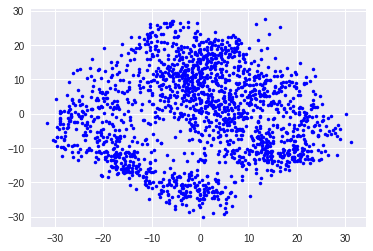

In [94]:
#############################################################################
# First: get the mean of the data set

mean = [np.mean(data[:,i]) for i in range (64)]  # why is it "64"

#############################################################################
# Second: get the principal components of all data

for i in range(64):
    normal = [(x - mean[i]) for x in data[:,i]]
    data[:, i] = normal

#############################################################################
# X = USV
# XV = US (equal to rotated data)

K = 2  # First two principal components will be used

U, S, V = np.linalg.svd(data)
Z = np.dot(U[:,:K], np.eye(K) * S[:K])

plt.plot(Z[:,0], Z[:,1], 'b.')

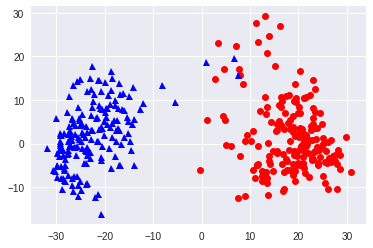

In [95]:
first = three 
second = four

#############################################################################
temp = np.reshape(first, (-1, 8*8))
Z = np.dot(temp, np.transpose(V))
plt.plot(Z[:,0], Z[:,1], 'ro')

#############################################################################
temp = np.reshape(second, (-1, 8*8))
Z = np.dot(temp, np.transpose(V))
plt.plot(Z[:,0], Z[:,1], 'b^')

In [101]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [107]:
!ls "/gdrive/My Drive/Colab Notebooks/"
path = "/gdrive/My Drive/Colab Notebooks/"

data.csv  OCT_23_2018_PCA.ipynb  OCT_23_2018_SVM.ipynb


In [0]:
# Save the data into a file

temp = np.reshape(three, (-1, 64))
Z = np.dot(temp, np.transpose(V))
F1 = Z[:,0]
F2 = Z[:,1]

myFile = open(path+'mnist_data.csv', 'w')
for i in range(len(F1)):
    myFile.write('3' + ',' + str(F1[i]) + ',' + str(F2[i]) + '\n')
myFile.close()


temp = np.reshape(four, (-1, 64))
Z = np.dot(temp, np.transpose(V))
F1 = Z[:,0]
F2 = Z[:,1]

myFile = open(path+'mnist_data.csv', 'a')
for i in range(len(F1)):
    myFile.write('4' + ',' + str(F1[i]) + ',' + str(F2[i]) + '\n')
myFile.close()

